In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:

## dataset loading
sns.set(style="whitegrid")

print("Please upload your file.")
uploaded = files.upload()

filename = next(iter(uploaded))

df = pd.read_csv(filename)
print("\nDataset loaded successfully!")

print("\nFirst 5 rows of the dataset:")
df.head()

Please upload your file.


Saving hotel_bookings.csv to hotel_bookings (2).csv

Dataset loaded successfully!

First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  


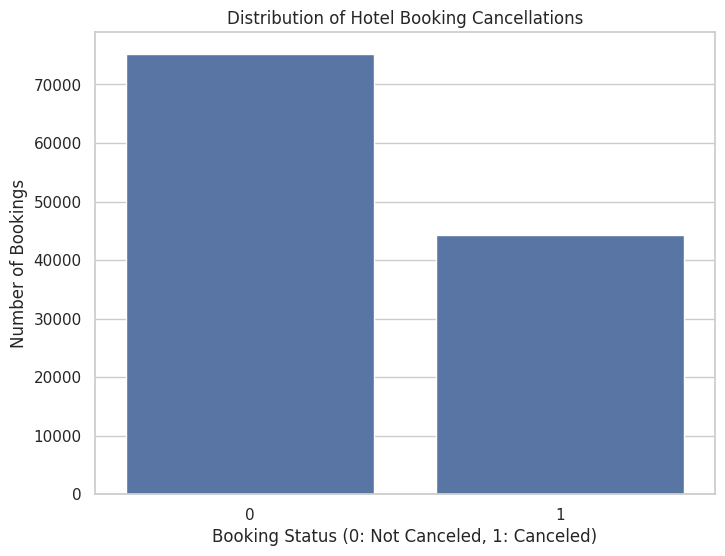

is_canceled
0    75166
1    44224
Name: count, dtype: int64


In [ ]:
#is cancelled checking how many/rate?
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Hotel Booking Cancellations')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Number of Bookings')
plt.show()

print(df['is_canceled'].value_counts())

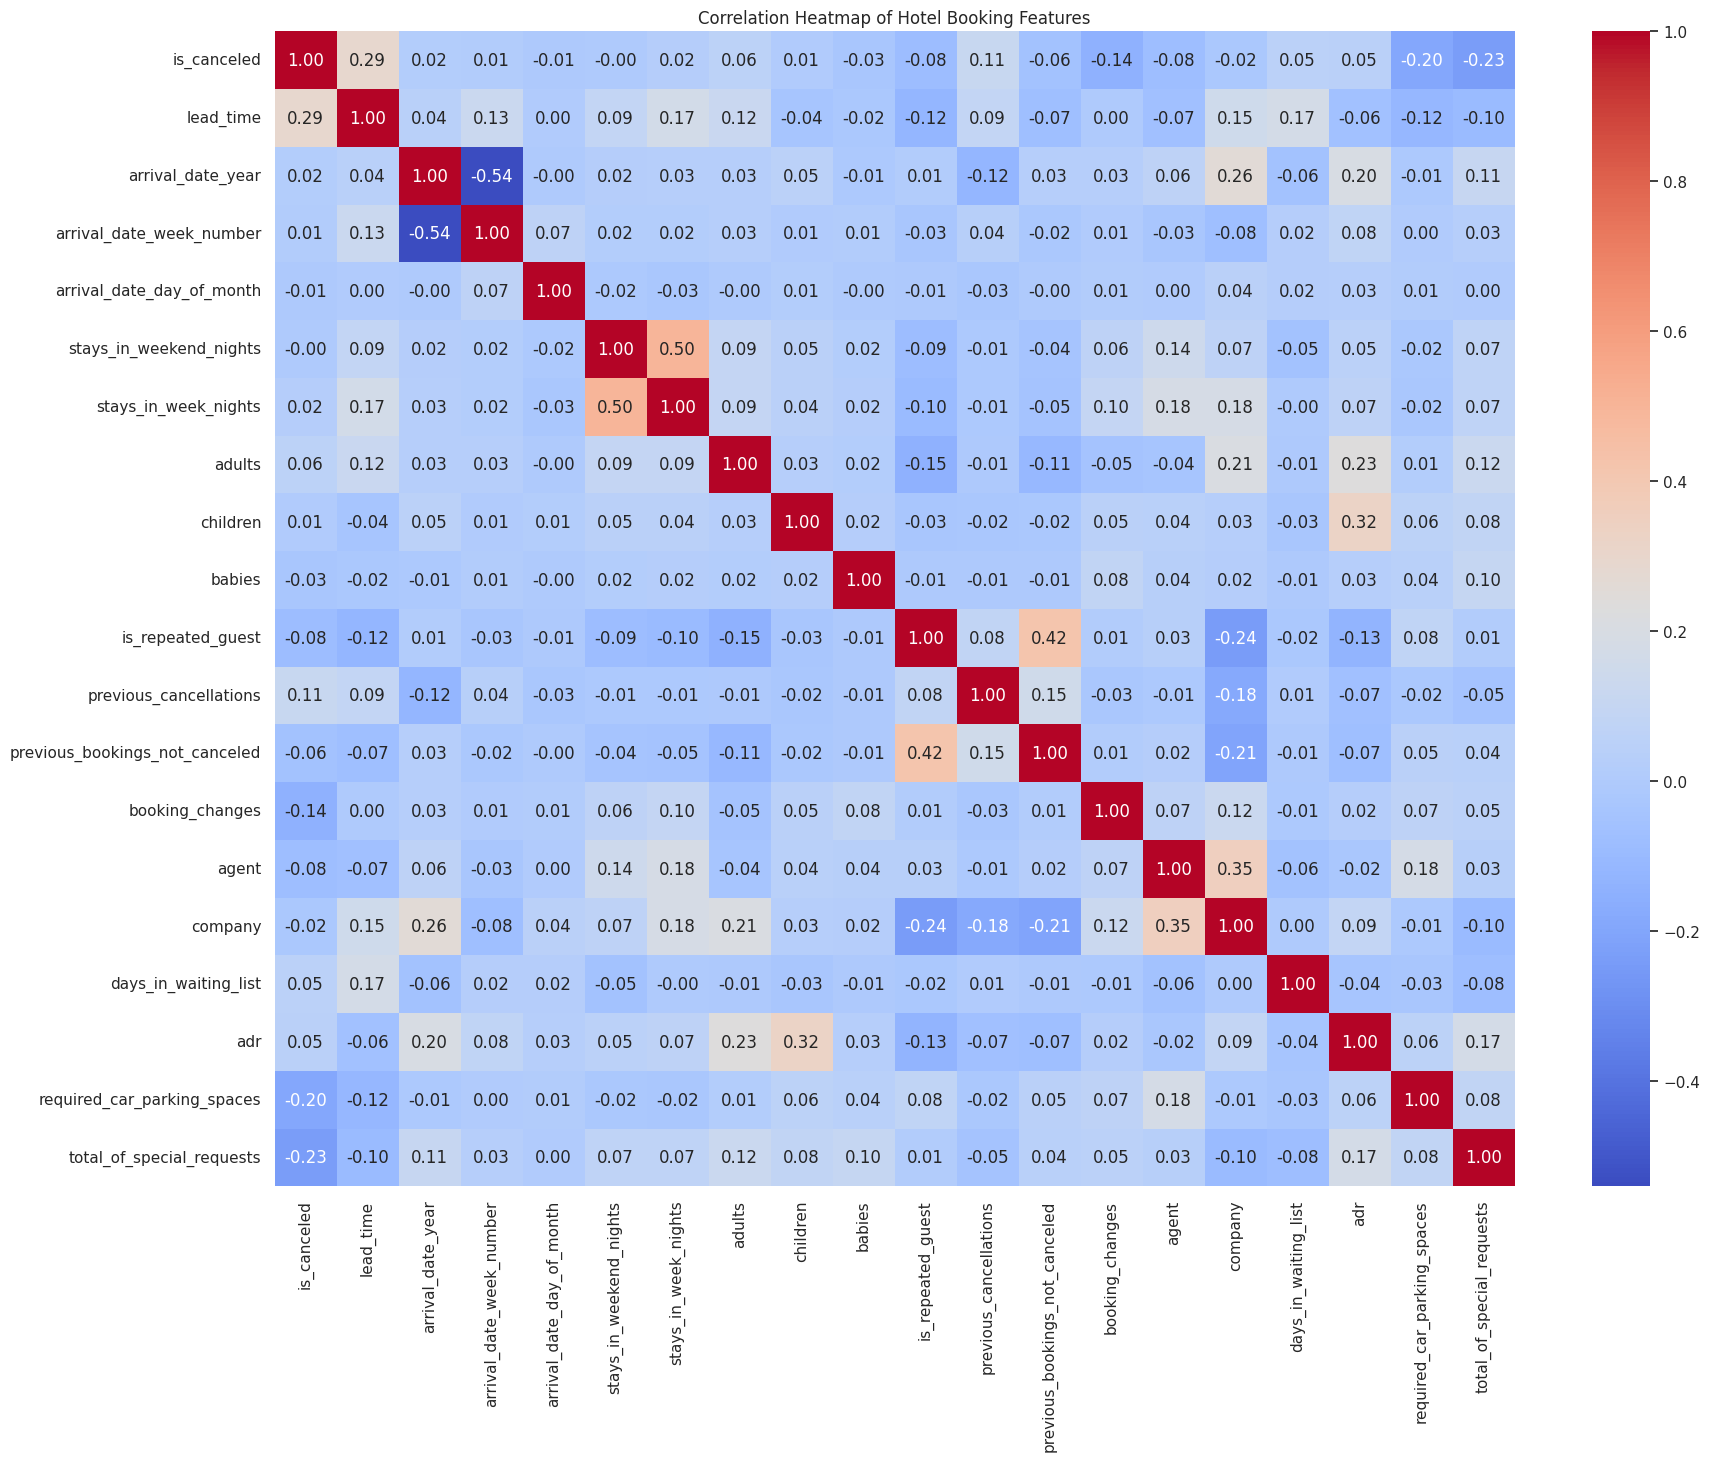

In [ ]:
#heatmap
numerical_cols = df.select_dtypes(include=np.number)

corr_matrix = numerical_cols.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Hotel Booking Features')
plt.show()

In [ ]:

print("--- Cancellation Rate by Deposit Type ---")

print(df.groupby('deposit_type')['is_canceled'].mean())
print("\n")

print("--- Cancellation Rate by Customer Type ---")
print(df.groupby('customer_type')['is_canceled'].mean())
print("\n")

print("--- Cancellation Rate by Special Requests ---")
print(df.groupby('total_of_special_requests')['is_canceled'].mean())

--- Cancellation Rate by Deposit Type ---
deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64


--- Cancellation Rate by Customer Type ---
customer_type
Contract           0.309617
Group              0.102253
Transient          0.407463
Transient-Party    0.254299
Name: is_canceled, dtype: float64


--- Cancellation Rate by Special Requests ---
total_of_special_requests
0    0.477204
1    0.220249
2    0.220989
3    0.178614
4    0.105882
5    0.050000
Name: is_canceled, dtype: float64


** PRE PROCESSING**


In [ ]:
#dropping column as it has way too many missing values:
df.drop('company', axis=1, inplace=True)
print("Dropped 'company' column.")

Dropped 'company' column.


In [ ]:
#for agent, lets assume empty means didnt come through agent,
df['agent'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)

print("Filled missing values in 'agent', 'country', and 'children'.")

print("\nTotal missing values after cleaning:")
print(df.isnull().sum().sum())

Filled missing values in 'agent', 'country', and 'children'.

Total missing values after cleaning:
0


/tmp/ipython-input-2144008147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
/tmp/ipython-input-2144008147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [ ]:
#need to drop reservation status as it has a value called cancelled, could confuse the model. if reservetaion status is dropped, no need for status date.

df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
print("Dropped 'reservation_status' and 'reservation_status_date' columns.")


Dropped 'reservation_status' and 'reservation_status_date' columns.


In [ ]:
#need to convert objects (strings) to number. one hot encoding should be perfect.
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# this is where it is made. making copies then dropping  the object one
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Successfully converted categorical columns to numerical using one-hot encoding.")
print(f"Original number of columns: {df.shape[1]}")
print(f"Number of columns after encoding: {df_encoded.shape[1]}")

df_encoded.head()

Successfully converted categorical columns to numerical using one-hot encoding.
Original number of columns: 29
Number of columns after encoding: 247


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#x is the features, y is the target
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

#here is the split is done in a way that the imbalance does not effect the training set vs test set, basically unbiased splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


#scaling is required. because some columns have high values like multiple digits, some dont. model can be biased toward them which is not good.
scaler = StandardScaler()
#transofrimng the featuresets.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData has been split and scaled successfully.")

Training set shape: (83573, 246)
Testing set shape: (35817, 246)

Data has been split and scaled successfully.


**SUPERVISED SECTION**


















In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# MODEL 1: Logistic Regression
#training part

log_reg = LogisticRegression(random_state=42, max_iter=1000)

print("Training the Logistic Regression model...")
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Model training and prediction complete.")

Training the Logistic Regression model...
Model training and prediction complete.


--- Logistic Regression Evaluation ---
Accuracy: 0.8179
AUC Score: 0.8959

Classification Report:
                  precision    recall  f1-score   support

Not Canceled (0)       0.82      0.91      0.86     22550
    Canceled (1)       0.81      0.67      0.73     13267

        accuracy                           0.82     35817
       macro avg       0.82      0.79      0.80     35817
    weighted avg       0.82      0.82      0.81     35817

Confusion Matrix:


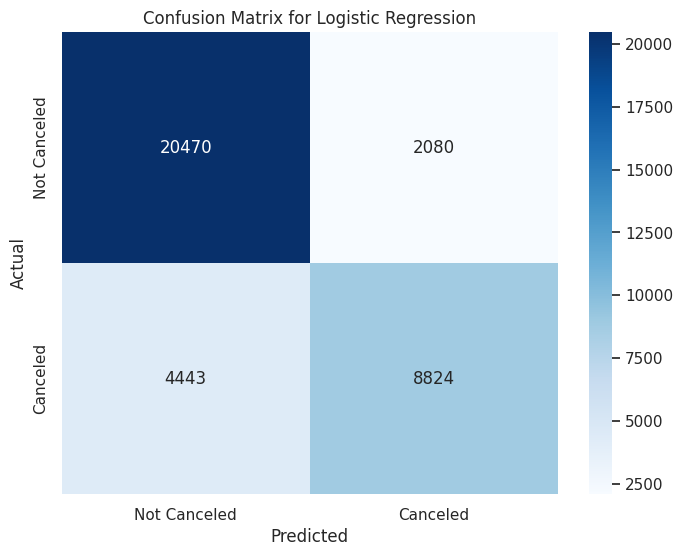

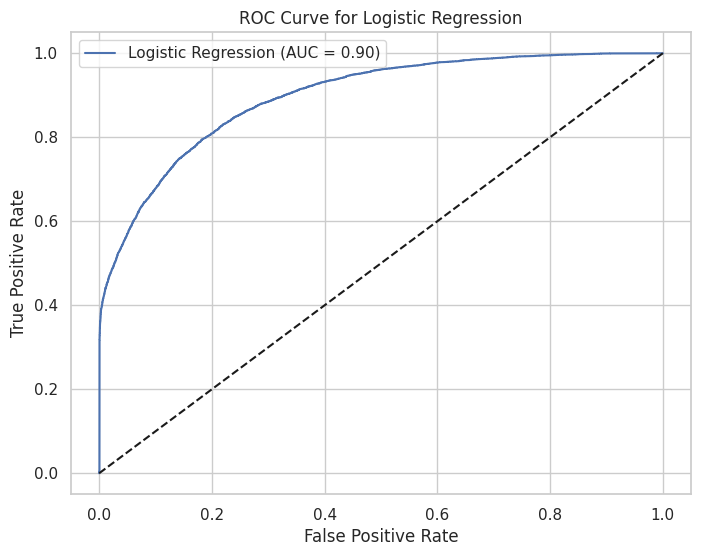

In [ ]:
#testing part

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score


model_results = {}
print("--- Logistic Regression Evaluation ---")


y_pred_log_reg = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

model_results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'AUC': auc_lr
}


#matrix
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"AUC Score: {auc_lr:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Not Canceled (0)', 'Canceled (1)']))
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


#roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [ ]:
#MODEL 2: Desicion tree
from sklearn.tree import DecisionTreeClassifier

#TRAINING
dt_clf = DecisionTreeClassifier(random_state=42)

print("Training the Decision Tree model...")
dt_clf.fit(X_train, y_train)

print("Model training complete.")

Training the Decision Tree model...
Model training complete.



--- Decision Tree Evaluation ---
Accuracy: 0.8597
AUC Score: 0.8518

Classification Report:
                  precision    recall  f1-score   support

Not Canceled (0)       0.89      0.89      0.89     22550
    Canceled (1)       0.81      0.81      0.81     13267

        accuracy                           0.86     35817
       macro avg       0.85      0.85      0.85     35817
    weighted avg       0.86      0.86      0.86     35817

Confusion Matrix:


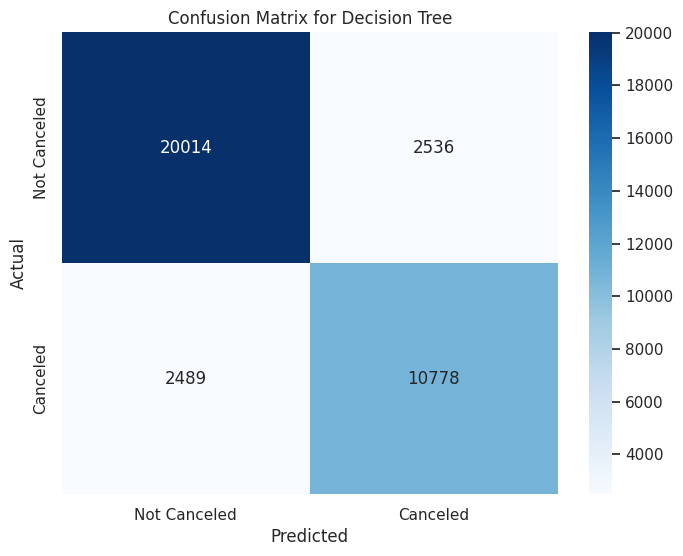

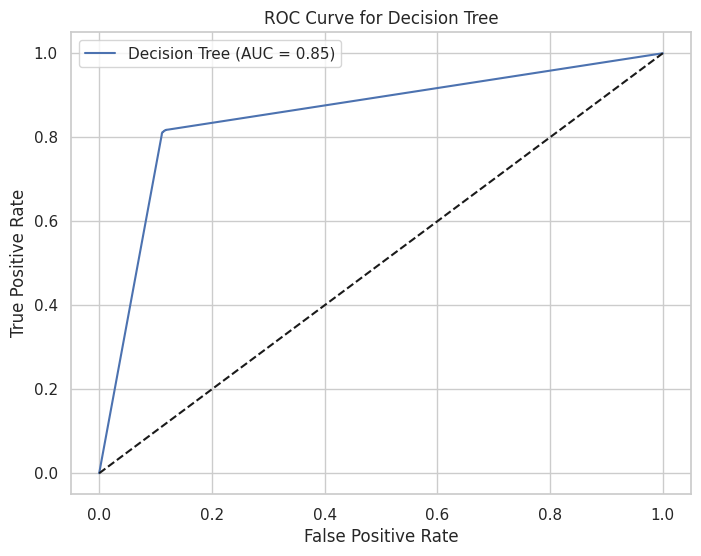

In [ ]:
#TESTING
print("\n--- Decision Tree Evaluation ---")

#evaluation
y_pred_dt = dt_clf.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)


model_results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt,
    'AUC': auc_dt
}


print(f"Accuracy: {accuracy_dt:.4f}")
print(f"AUC Score: {auc_dt:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Canceled (0)', 'Canceled (1)']))

#matrix
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#roc
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

In [ ]:
#MODEL 3: neural network
#training
import tensorflow as tf
from tensorflow import keras


nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


print(nn_model.summary())


print("\nTraining the Neural Network model...")
history = nn_model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=256,
                       validation_split=0.2,
                       verbose=1)

print("\nModel training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        15,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 0 (0.00 B)

None

Training the Neural Network model...
Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7508 - auc: 0.8076 - loss: 0.5011 - val_accuracy: 0.8318 - val_auc: 0.9094 - val_loss: 0.3583
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8361 - auc: 0.9140 - loss: 0.3450 - val_accuracy: 0.8446 - val_auc: 0.9198 - val_loss: 0.3388
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8441 - auc: 0.9227 - loss: 0.3293 - val_accuracy: 0.8509 - val_auc: 0.9256 - val_loss: 0.3276
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8542 - auc: 0.9304 - loss: 0.3147 - val_accuracy: 0.8513 - val_auc: 0.9270 - val_loss: 0.3250
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8582 - auc: 0.9341 - loss: 0.3050 - val_accuracy: 0.8536 - val_auc: 0.9286 - val_loss: 0.3221
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8612 - auc: 0.9371 - loss: 0.2996 - val_accuracy: 0.8579 - val_auc: 0.9315 - val_loss: 0.31


--- Neural Network Evaluation ---
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8548
AUC Score: 0.9312

Classification Report:
                  precision    recall  f1-score   support

Not Canceled (0)       0.87      0.90      0.89     22550
    Canceled (1)       0.82      0.77      0.80     13267

        accuracy                           0.85     35817
       macro avg       0.85      0.84      0.84     35817
    weighted avg       0.85      0.85      0.85     35817

Confusion Matrix:


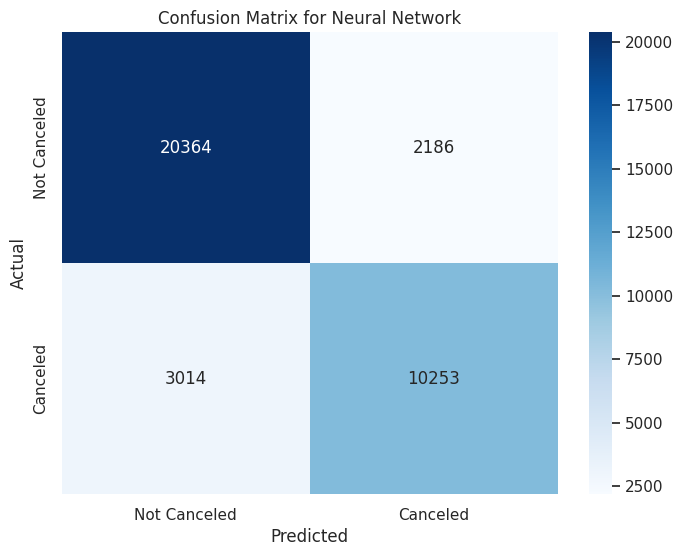

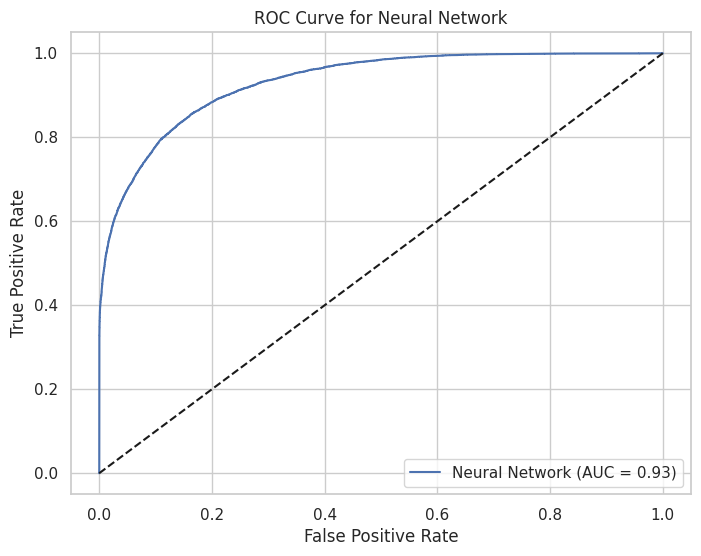

In [ ]:
#eval part
print("\n--- Neural Network Evaluation ---")

y_pred_proba_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)


accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_proba_nn)


model_results['Neural Network'] = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-Score': f1_nn,
    'AUC': auc_nn
}

print(f"Accuracy: {accuracy_nn:.4f}")
print(f"AUC Score: {auc_nn:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Not Canceled (0)', 'Canceled (1)']))
print("Confusion Matrix:")


#matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()

#roc
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend()
plt.show()

**UNSUPERVISED**


In [ ]:
#kmeans cluster
#MODEL 4: K-Means Clustering
from sklearn.cluster import KMeans

print("Clustering...")

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)


df_train = df.loc[y_train.index]
df_train['cluster'] = kmeans.labels_

print("K-Means clustering complete.")

print("\nCancellation rate per cluster:")
cluster_analysis = df_train.groupby('cluster')['is_canceled'].value_counts(normalize=True).unstack()
print(cluster_analysis)

Clustering...
K-Means clustering complete.

Cancellation rate per cluster:
is_canceled         0         1
cluster                        
0            0.700236  0.299764
1            0.507255  0.492745


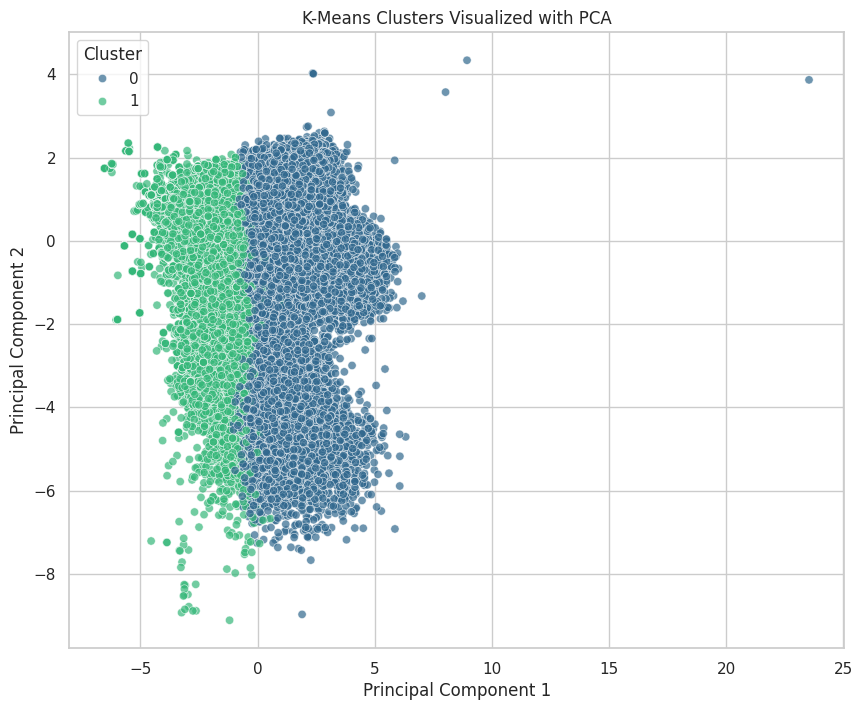

In [ ]:

from sklearn.decomposition import PCA

# 2 dimensional
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = kmeans.labels_

#clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
#silhouette
from sklearn.metrics import silhouette_score


sample_indices = np.random.choice(X_train.shape[0], 20000, replace=False)
silhouette_avg = silhouette_score(X_train[sample_indices], kmeans.labels_[sample_indices])

print(f"The Silhouette Score for our K-Means clustering is: {silhouette_avg:.4f}")

The Silhouette Score for our K-Means clustering is: 0.0141


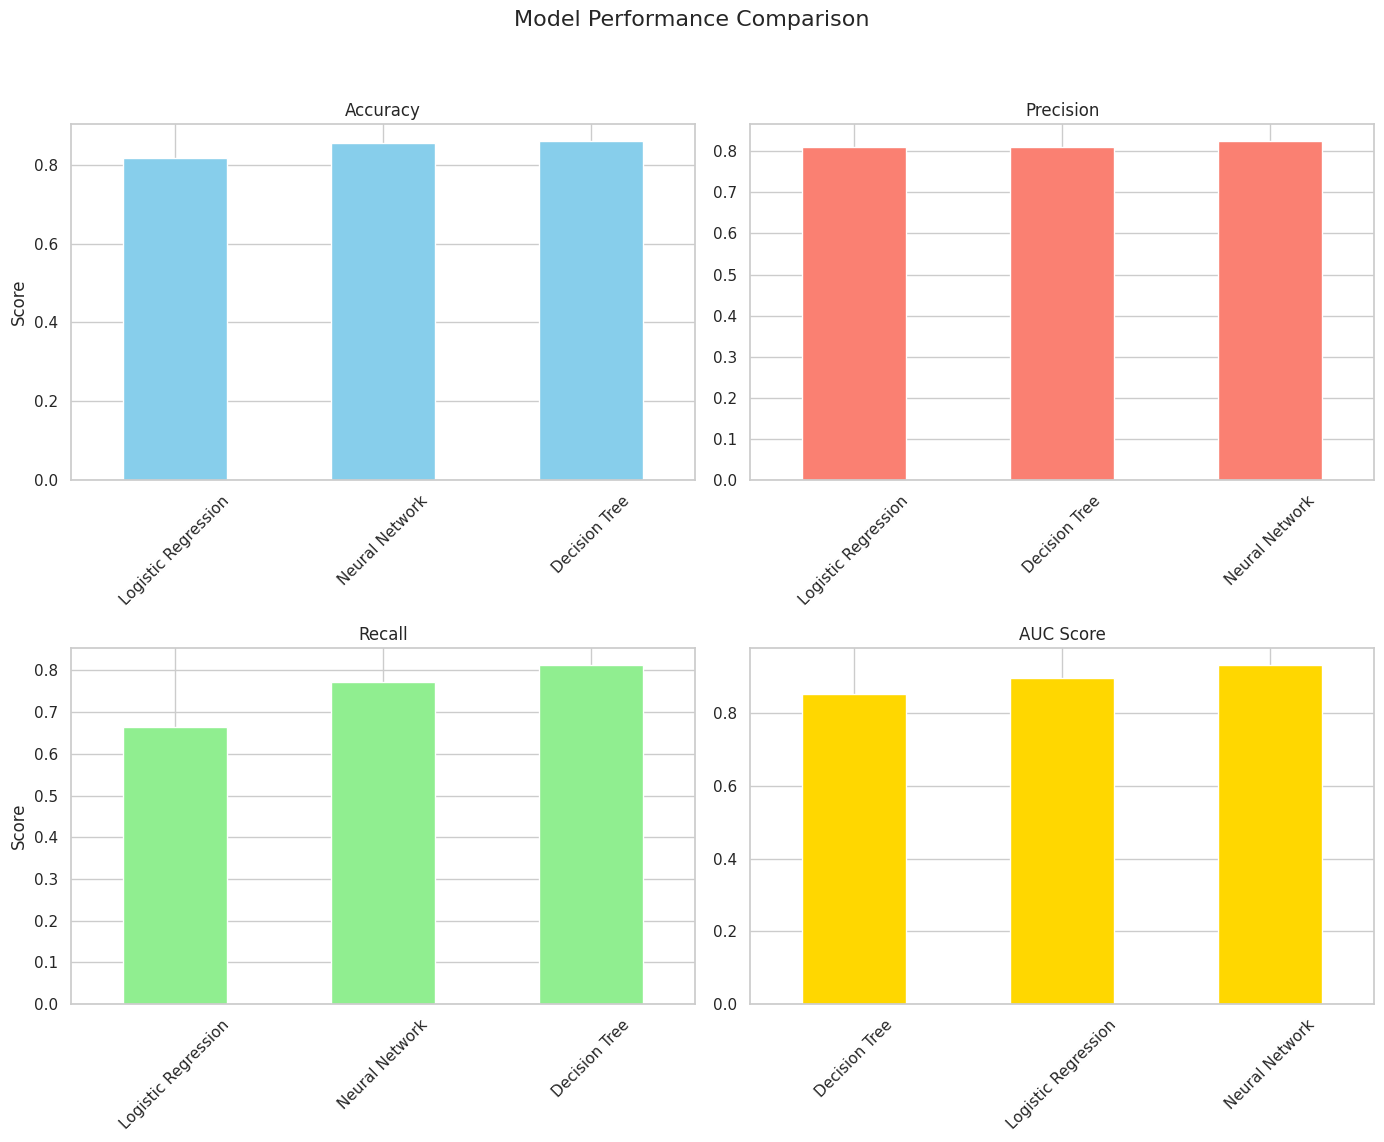


--- Final Model Results ---
                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.817880   0.809244  0.665109  0.730131  0.895924
Decision Tree        0.859703   0.809524  0.812392  0.810955  0.851848
Neural Network       0.854818   0.824262  0.772820  0.797713  0.931199


In [ ]:
#MODEL COMPARISONS AND ANALYSIS

#result dictionary to panda visualization
results_df = pd.DataFrame(model_results).T

#plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

#accuracy
results_df['Accuracy'].sort_values().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Score')
axes[0, 0].tick_params(axis='x', rotation=45)

#precision
results_df['Precision'].sort_values().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

#recall
results_df['Recall'].sort_values().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)

#AUC
results_df['AUC'].sort_values().plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('AUC Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




print("\n--- Final Model Results ---")
print(results_df)